<a href="https://colab.research.google.com/github/LipAnn/Lords-of-Benzene/blob/master/Task_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать. 

После установки нужных версий нажмите на кнопку Restart runtime, которая появится в следующей ячейке после завершения ее выполнения.

После перезапуска (restart runtime) устанавливать библиотеки еще раз не нужно, достаточно проверить, что установилась их новая версия. 

На скачивание файла и установку понадобится не более 5 минут.

**Важно!** Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!** Если вы предпочитаете делать практические задания на своем личном ноутбуке, то предлагаем вам завести виртуальное окружение и установить в нем библиотеки из файла requirements.txt по ссылке https://drive.google.com/file/d/1br9tHmdccGVzpk0svXNmHxVMh_OF2oZR/view?usp=sharing
В таком случае виртуальное окружение достаточно настроить всего один раз.



In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 1br9tHmdccGVzpk0svXNmHxVMh_OF2oZR
! pip install -r /content/requirements.txt

Downloading...
From: https://drive.google.com/uc?id=1br9tHmdccGVzpk0svXNmHxVMh_OF2oZR
To: /content/requirements.txt
100% 328/328 [00:00<00:00, 464kB/s]
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 91 kB/s 
     |████████████████████████████████| 298 kB 34.4 MB/s 
     |████████████████████████████████| 13.5 MB 11.4 MB/s 
     |████████████████████████████████| 4.1 MB 19.8 MB/s 
     |████████████████████████████████| 1.6 MB 25.0 MB/s 
     |████████████████████████████████| 134 kB 37.4 MB/s 
     |████████████████████████████████| 1.7 MB 37.4 MB/s 
     |████████████████████████████████| 2.0 MB 27.4 MB/s 
     |████████████████████████████████| 11.2 MB 3.1 MB/s 
     |████████████████████████████████| 27.7 MB 1.9 MB/s 
     |████████████████████████████████| 285 kB 42.4 MB/s 
     |████████████████████████████████| 88 kB 4.6 MB/s 
     |████████████████████████████████| 255.9 MB 35 kB/

# Часть 0. Знакомство с библиотекой scikit-learn

Scikit-learn - это библиотека машинного обучения с открытым исходным кодом, которая предоставляет различные инструменты для предобработки данных и обучения моделей.

Каждый модуль предобработки данных имеет два метода: fit и transform. Как правило, метод fit принимает на вход **обучающую** выборку $X$ и считает по ней необходимые для заданного типа преобразования статистики. Метод transform преобразует входные данные, используя статистики, посчитанные при вызове метода fit и возвращает преобразованные данные. Выборка $X$ представляется в виде матрицы размера (n_samples, n_features), то есть каждому объекту соответсвует отдельная строка, а каждому признаку - отдельный столбец.

Каждая модель машинного обучения имеет два метода: fit - метод ответственный за обучения модели и predict - метод ответственный за предсказание целевой переменной. Как правило, метод fit принимает на вход два аргумента: $X$ - **обучающая** выборка, $y$ - значения целевых переменных на объектах обучающей выборки. Метод predict принимает на вход набор данных и выдает предсказанные значения целевых переменных на этом наборе данных. Если нами решается задача классификации, то вектор целевых переменных $y$ содержит целые числа (или другое множество дискретных величин). При решении задачи регрессии вектор $y$ содержит вещественные числа.

Более подробно про библиотеку можно прочитать в документации по [ссылке](https://scikit-learn.org/stable/index.html)

Приведем пример стандартной работы с библиотекой sciki-learn

In [ ]:
#Создаем обучающую выборку
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

#Делаем импорт класса K-NN классификатора
from sklearn.neighbors import KNeighborsClassifier

#Создаем объект класса 3-NN классификатора
neigh = KNeighborsClassifier(n_neighbors=3)

#Обучаем классифкатора на созданной ранее выборке
neigh.fit(X, y)

#Предсказываем метку класса нового объекта с помощью метода predict
print(neigh.predict([[1.1]]))

[0]


# Часть 1. Нормализация признакового пространства

В задачах машинного обучения важную роль играет нормализация данных. Для числовых признаков, как правило, используют два типа нормализации:

* Нормализация к распределению с нулевым матожиданием и единичной дисперсией $x := \frac{x - E(x)}{\sigma (x)}$
* Нормализация в отрезок [0, 1] $x := \frac{x - \min(x)}{\max(x) - \min(x)}$, где минимум и максимум берется по каждой размерности отдельно

Рассмотрим пример. Ниже приведены: таблца до нормализации признаков, таблица после нормализации к нулевому матожиданию и единичной дисперсии, таблица после нормализации в отрезок [0, 1]

До нормализации 

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 1           | 2           |
| 2           | -1          |
| 3           | 0           |

Нормализация к нулевому матожиданию и единичной дисперсии

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| -1.225      | 1.336       |
| 0           | -1.069      |
| 1.225       | -0.267      |

Нормализация в отрезок [0, 1]

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 0           | 1           |
| 0.5         | 0           |
| 1           | 0.333       |

**1.1** (тесты, 5 баллов) В модуле scalers.py реализуйте два вида нормализации признакового пространства. StandardScaler - нормализация к распределению с нулевым матожиданием и единичной дисперсией, MinMaxScaler - нормализация в отрезок [0, 1].

Нормализаторы имеют два метода - метод fit и метод transform. Метод fit получает на вход **обучающую** выборку и считает по ней все необходимые для заданного преобразования статистики. Метод transform преобразует данные, используя статистистики, посчитанные при вызове метода fit.

In [ ]:
from scalers import StandardScaler, MinMaxScaler

In [ ]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt

Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [ ]:
with open('data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [ ]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

Визуализируем наши данные

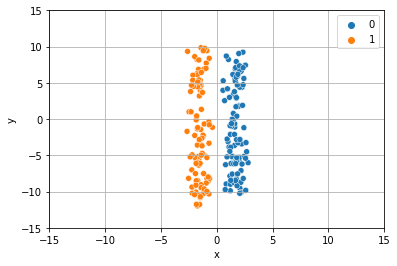

In [ ]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['darkorange', 'c', 'darkblue', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    #     # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1-NN$ и $10-NN$

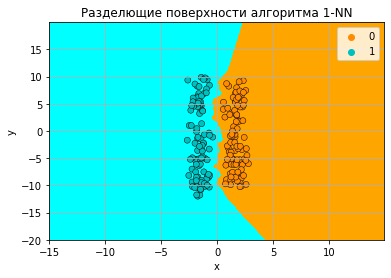

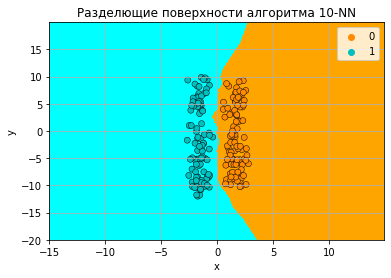

In [ ]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

**1.2** (кросс, 2 балла) Чем отличаются поверхности, полученные при числе соседей 1 и 10? Объясните, чем вызваны данные отличия.

ВАШ ОТВЕТ

Рассуждения о том, что большее число соседей дает более гладкие границы

**1.3** (кросс, 3 балла) Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x=0$ при значениях $y < -10$ и $y > 10$. Дайте строгое математическое обоснование наблюдаемого явления

ВАШ ОТВЕТ

Рассуждения про различный масштаб признаков

Данную проблему может решить нормализация признакового пространства. 

**1.4** (кросс, 1 балл) Начертите разделяющие поверхности для $KNN$, обученного на нормализованных признаках. Используйте функцию $plot\_knn\_bound$

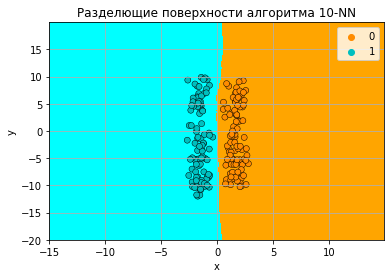

In [ ]:
#ваш код

scaler = MinMaxScaler()
scaler.fit(X)
plot_knn_bound(X, y, scaler=scaler, n_neighbors=10)

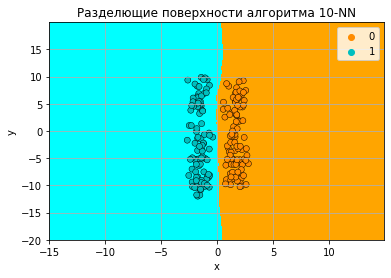

In [ ]:
#ваш код

scaler = StandardScaler()
scaler.fit(X)
plot_knn_bound(X, y, scaler=scaler, n_neighbors=10)

**1.5** (кросс, 4 балла) Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются раделяющие поверхности этого классификатора? Требуется математически строго, однозначно и с полным обоснованием определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

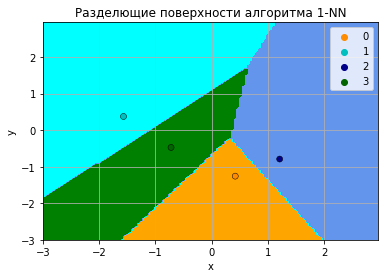

In [ ]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

ВАШ ОТВЕТ

Разделяющие поверхности - серединные перпендикуляры. Указанное разбиение плоскости является диаграммой Вороного

# Часть 2. Кросс-валидация на задаче регрессии

При решении прикладных задач, как правило, доступна лишь обучающая выборка. Для того чтобы иметь возможность оценить качество модели на тестовой выборке, прибегают к методу, называемому кросс-валидация.   
Пусть зафиксирован некоторый набор параметров модели. В $KNN$ под параметрами могут пониматься число соседей, метрика близости $\rho$, стратегия выбора весов $w_i$. При кросс-валидации **обучающая** выборка делится на $n$ равных частей (folds). Затем обучаются $n$ моделей с заданными параметрами (у всех моделей параметры одинаковые и фиксированы) - $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold). Затем измеряется качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, то полученная оценка качества модели будет являться корректной. Финальным значением метрики качества для модели с заданными параметрами является среднее полученных нами значений на $n$ фолдах.

Принцип работы кросс-валидации схематично изображен на рисунке.

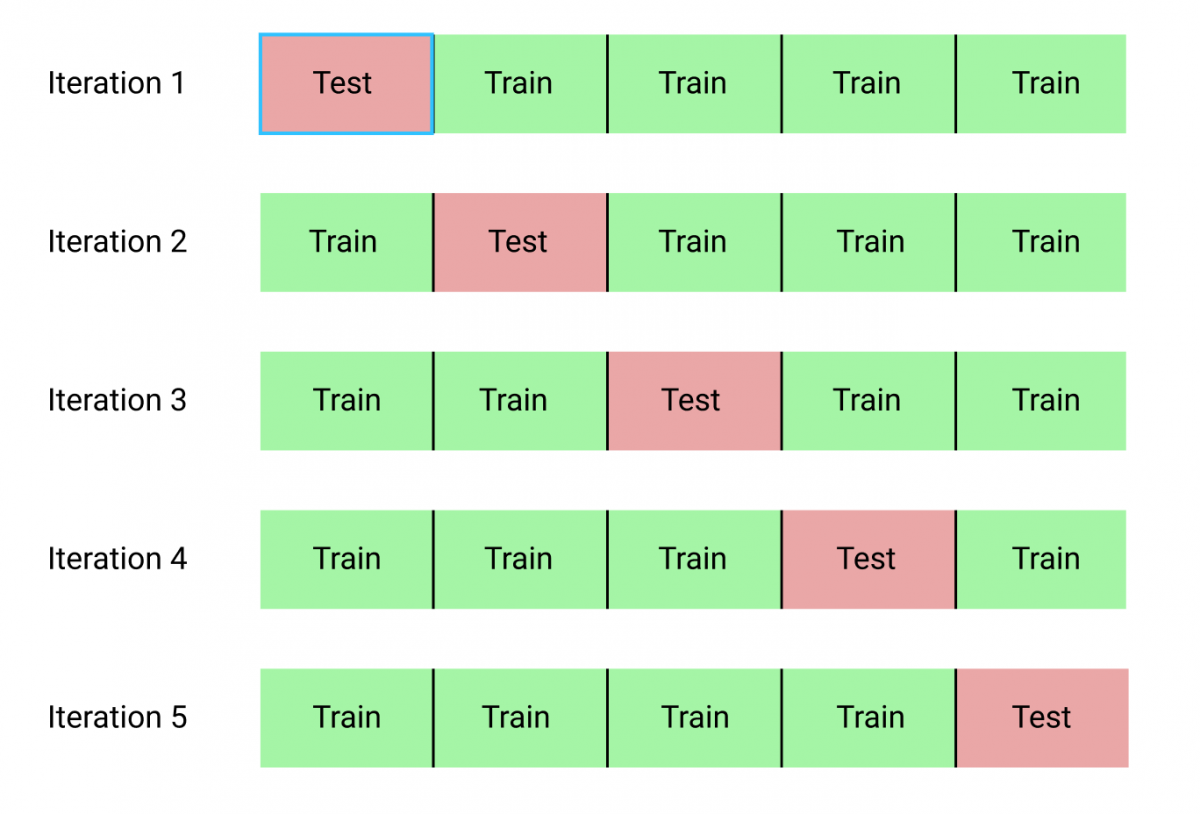

Небольшое видео объяснение о том, как работает кросс-валидация, можно посмотреть по [ссылке](https://www.youtube.com/watch?v=fSytzGwwBVw)

**2.1** (тест, 10 баллов) В модуле cross\_val.py реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели

Далее будем решать задачу предсказания цены дома в Калифорнии с помощью $KNN$-регрессии. В качестве метрики качества будем использовать $R^2-$score.

$R^2(y\_true, y\_predict) = 1 - \frac{\sum_{i=1}^{n} (y\_true_i - y\_predict_i)^2}{\sum_{i=1}^{n} (y\_true_i - E(y\_true_i))^2}$ 

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
X, y = fetch_california_housing(return_X_y=True)

**2.2** (кросс, 2 балла) Разбейте выборку на обучающую (75%) и тестовую (25%) с помощью функции $train\_test\_split$. Не забудьте перемешать данные перед разбиением (см. параметры функции). Запустите кросс-валидацию на 3 фолдах с помощью реализованных вами функций $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $r2\_score$. Параметры для перебора описаны ниже

In [ ]:
# ваш код
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [ ]:
from sklearn.metrics import r2_score

parameters = {
    'n_neighbors': [1, 5, 10],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(None, 'None'), (MinMaxScaler(), 'MinMax'), (StandardScaler(), 'Standard')]
}

In [ ]:
from cross_val import kfold_split, knn_cv_score
# ваш код
folds = kfold_split(X_train.shape[0], 3)
out = knn_cv_score(X_train, y_train, parameters, r2_score, folds, neighbors.KNeighborsRegressor)

**2.3** (кросс, 2 балла) Какой наибольший $r2\_score$ удалось достичь на валидации? Какие закономерности вы видите? Обучите модель с наилучшими параметрами на всей обучающей выборке, измерьте $r2\_score$ на тестовой выборке.

In [ ]:
#ваш код
sorted(out.items(), key=lambda item: -item[1])

[(('MinMax', 10, 'euclidean', 'distance'), 0.7035316821435433),
 (('MinMax', 5, 'euclidean', 'distance'), 0.6964752425342953),
 (('MinMax', 10, 'euclidean', 'uniform'), 0.6955574490923349),
 (('Standard', 10, 'euclidean', 'distance'), 0.691615057187545),
 (('MinMax', 5, 'euclidean', 'uniform'), 0.6915621333110309),
 (('Standard', 10, 'euclidean', 'uniform'), 0.6860471330995802),
 (('Standard', 5, 'euclidean', 'distance'), 0.6834229913464561),
 (('Standard', 10, 'cosine', 'distance'), 0.6829471618912982),
 (('Standard', 5, 'euclidean', 'uniform'), 0.6793573692425973),
 (('Standard', 10, 'cosine', 'uniform'), 0.6765890035252449),
 (('Standard', 5, 'cosine', 'distance'), 0.666103286084983),
 (('MinMax', 10, 'cosine', 'distance'), 0.6650747099452022),
 (('Standard', 5, 'cosine', 'uniform'), 0.6639133943561187),
 (('MinMax', 10, 'cosine', 'uniform'), 0.6595874224717159),
 (('MinMax', 5, 'cosine', 'distance'), 0.6439729194747218),
 (('MinMax', 5, 'cosine', 'uniform'), 0.6429483717302537),
 (

ВАШ ОТВЕТ

Наибольший скор = 0.70, достигается на ('MinMax', 10, 'euclidean', 'distance'). Нормализация значительно увеличивает качество. В целом, $KNN$ с весами, обратно пропорциональными расстоянию, работает лучше

In [ ]:
# ваш код
regr = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean')
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.7117082182374788

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике. В качестве метрики качества будем использовать $accuracy\_score$. Accuracy - это доля верно классифицированных объектов, среди всех объектов выборки.

In [ ]:
import numpy as np

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [ ]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
X_train = np.array(X_train, dtype=object)

In [ ]:
X_test = np.array(X_test, dtype=object)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в метрическое пространство фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* **Токенизация.** Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* **Нормализация.** Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* **Векторизация.** Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации. Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа. Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ можно прочитать [здесь](https://ru.wikipedia.org/wiki/TF-IDF).

В sklearn все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [ ]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')

**3.1** (кросс, 2 балла) Найдите оптимальные параметры обучения модели. Предлагается осуществлять перебор параметров по заданной ниже сетке. Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$.

In [ ]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [ ]:
#ваш код
folds = kfold_split(len(X_train), 3)
out = knn_cv_score(X_train, y_train, parameters, accuracy_score, folds, neighbors.KNeighborsClassifier)

In [ ]:
sorted(out.items(), key=lambda item: -item[1])

[(('TfidfVectorizer', 4, 'cosine', 'distance'), 0.7822165473911665),
 (('TfidfVectorizer', 1, 'euclidean', 'uniform'), 0.7820399236644299),
 (('TfidfVectorizer', 1, 'euclidean', 'distance'), 0.7820399236644299),
 (('TfidfVectorizer', 1, 'cosine', 'uniform'), 0.7820399236644299),
 (('TfidfVectorizer', 1, 'cosine', 'distance'), 0.7820399236644299),
 (('TfidfVectorizer', 2, 'euclidean', 'distance'), 0.7820399236644299),
 (('TfidfVectorizer', 2, 'cosine', 'distance'), 0.7820399236644299),
 (('TfidfVectorizer', 6, 'cosine', 'distance'), 0.7799182595609984),
 (('TfidfVectorizer', 8, 'cosine', 'distance'), 0.7797413311893834),
 (('TfidfVectorizer', 5, 'cosine', 'distance'), 0.7793883649465666),
 (('TfidfVectorizer', 7, 'cosine', 'distance'), 0.7792995258132166),
 (('TfidfVectorizer', 9, 'cosine', 'distance'), 0.7786807451969923),
 (('TfidfVectorizer', 3, 'cosine', 'distance'), 0.7776204404152581),
 (('TfidfVectorizer', 10, 'cosine', 'distance'), 0.7768247782958616),
 (('TfidfVectorizer', 4, '

**3.2** (кросс, 2 балла) Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [ ]:
# ваш код
tf = []
count = []
for key in out:
    if key[0] == 'CountVectorizer':
        count.append(out[key])
    elif key[0] == 'TfidfVectorizer':
        tf.append(out[key])

print(np.mean(count), np.mean(tf))

0.6222374409914588 0.760506679854509


ВАШ ОТВЕТ

TfidfVectorizer. Если токен встречается в большом числе документов, то он менее информативен для определения класса конкретного документа и, наоборот. TF_IDF учитывает это, CountVectorizer - нет.

**3.3** (кросс, 2 балла) Какая метрика близости позволяет в среднем достичь наилучшее качество? Почему?

In [ ]:
# ваш код
cos = []
euc = []
for key in out:
    if key[2] == 'cosine':
        cos.append(out[key])
    elif key[2] == 'euclidean':
        euc.append(out[key])

print(np.mean(cos), np.mean(euc))

0.7508174905107807 0.6319266303351873


ВАШ ОТВЕТ

Косинусная близость. Сонаправленность векторов встречаемости токенов важнее чем разность их величин

**3.4** (кросс, 2 балла) Начертите график зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параматрам, кроме числа соседей

Сделайте выводы о наблюдаемых зависимостях

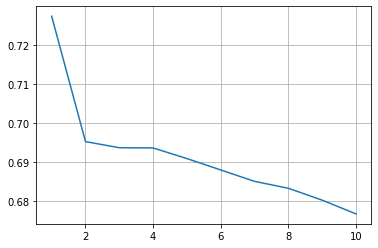

In [ ]:
# ваш код
from collections import defaultdict
dct = defaultdict(list)
arr = []
for i in range(1, 11):
    for key in out:
        dct[key[1]].append(out[key])

for i in range(1, 11):
    arr.append(np.mean(dct[i]))

sns.lineplot(x=range(1, 11), y=arr)
plt.grid()

ВАШ ОТВЕТ

С ростом числа сосдей метрика в среднем падает. Если обратить внимание на названия классов-тем, то можно заметить, что есть довольно близкие по смыслу темы. Вероятно, большее число соседей добавляет в целевую переменную шум от близких темах, что приводит к падению качества

**3.5** (кросс, 3 балла) Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему?

In [ ]:
#ваш код
cls = neighbors.KNeighborsClassifier(n_neighbors=4, weights='distance', metric='cosine')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')
tf_idf.fit(X_train)
X_train_scaled = tf_idf.transform(X_train)
X_test_scaled = tf_idf.transform(X_test)
cls.fit(X_train_scaled, y_train)
y_pred = cls.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6688794476898566

(array([1064., 1181., 1171., 1179., 1195., 1195., 1185., 1192., 1110.,
         842.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

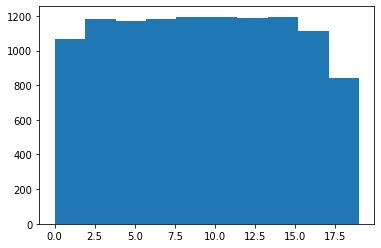

In [ ]:
plt.hist(y_train)

(array([708., 786., 780., 786., 795., 795., 789., 792., 740., 561.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

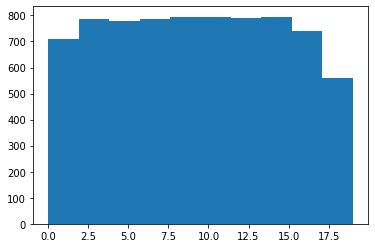

In [ ]:
plt.hist(y_test)

ВАШ ОТВЕТ

Качество на тесте сильно хуже качества на валидации. Распределения таргетов совпадают. Видимо, проблема в oov токенах на тестовой выборке